<a href="https://colab.research.google.com/github/DanielAlonsoCuriel/deeplearning/blob/main/Practica1Grupo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# 1._ IMPORTAMOS KERAS
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import numpy as np
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: []
2.9.2


In [9]:
# 2.- CARGAMOS EL CONJUNTO DE DATOS Fashion-MNIST EN KERAS
# fashion_mnist = tf.keras.datasets.fashion_mnist
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [10]:
print(train_images.shape)

(60000, 28, 28)


In [18]:
# Vemos la matriz de la imagen número 30 (28x28)
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[30]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [17]:
# La imagen anterior corresponde con el número 5 (sandalia). Hasta se puede intuir.... 
train_labels[30]

5

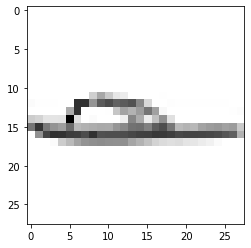

In [20]:
# Veamos el elemento 30 y pintémoslo con matplotlib
import matplotlib.pyplot as plt
digit = train_images[30]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [21]:
len(train_labels)

60000

In [22]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

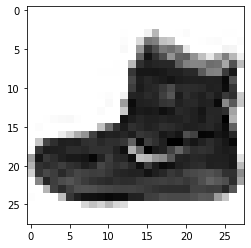

In [23]:
# Veamos el elemento 0 (que vemos que es un 9, bota) y pintémoslo con matplotlib
import matplotlib.pyplot as plt
digit = train_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Los datos de prueba:

In [24]:
test_images.shape

(10000, 28, 28)

In [25]:
len(test_labels)

10000

In [26]:
test_labels.shape, test_labels

((10000,), array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

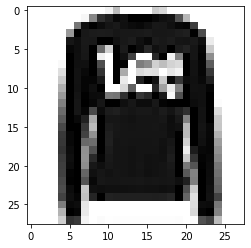

In [31]:
# Veamos el elemento 1 de test (que vemos que es un 2, jersey) y pintémoslo con matplotlib
import matplotlib.pyplot as plt
digit = test_images[1]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [32]:
# 3.- CONSTRUIMOS LA ARQUITECTURA DE LA RED DEL PRIMER CASO
from keras import models
from keras import layers

# El tipo de red será secuencial. Desde la entrada hasta la salida sin ciclos
network = models.Sequential()
# Creamos dos capas "Dense", que son capas neuronales densamente conectadas 
# (también llamadas "completamente conectadas"). Cada una de las 10 neuronas de
# la capa de entrada están conectadas con los 784 píxeles = 28*28. Solo lo 
# definimos para la primera capa. Para la segunda capa y posteriores, Keras lo 
# deduce.
network.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
# Probar 10 neuronas y 'sigmoid' <==============================================
# Capa de salida "softmax" de 10 vías (o neuronas). Significa que  
# devolverá una matriz de 10 puntuaciones de probabilidad (sumando 1)
# La puntuación será la probabilidad de que la imagen del dígito actual 
# pertenezca a una de nuestras clases de 10 dígitos.
network.add(layers.Dense(10, activation='softmax'))
# Cada capa aplica unas cuantas operaciones con tensores sencillas a los datos
# de entrada, y que estas operaciones implican tensores de pesos. Los tensores
# de peso, que son los atributos de las capas, son donde persiste el 
# "conocimiento" de la red.
# En general, la capa de salida de una red de clasificación tendrá tantas
# neuronas como clases, menos en la clasificación binaria, que con 1 vale. Cada 
# valor será la probabilidad de que la imagen del dígito actual pertenezca a cada
# una de las clases
network.summary()
# Nombre de las capas automáticos a no ser que lo definamos
# 7850 = 784 x 10 + 10 Sesgo
# 110 = 10x10 + 10 Sesgo
# 7960 = 7850 + 110

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [33]:
# 4.- HACEMOS EL PASO DE COMPILACIÓN CARGANDO EL  
# OPTIMIZADOR, LA FUNCIÓN DE PÉRDIDA Y LAS MÉTRICAS
# Algoritmo optimizador sgd: Es un algoritmo 
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
# 'categorical_crossentropy' es la función de pérdida que se utiliza como señal
# de retroalimentación para aprender los tensores de peso y que la fase de 
# entrenamiento intentará minimizar
# La reducción de la pérdida se produce mediante el descenso de gradiente
# estocástico minilote, cuyas reglas exactas están gobernadas por el optimizador
# 'sgd'
# 'accuracy': Solo tendremos en cuenta la fracción de imágenes que son
# correctamente clasificadas 

In [35]:
# 5.- PREPARAMOS LOS DATOS DE IMAGEN CON ALGUNA TRANSFORMACIÓN. NORMALIZACION
# Los tensores transformados tienen la misma cantidad de datos total que el 
# tensor inicial
train_images = train_images.reshape((60000, 28 * 28))
print(train_images)
print(len(train_images))
print(train_images.shape)
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[3000]))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
60000
(60000, 784)
[[  0   0   0   0   0   0   0   0   1   1   0   0 120 131  91 147  30   0   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   1
    3   0   0   0   0 251 199 172 195 152   0   0   0   0   3   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0  43 124 193 166 239
  255 216 172 228 126  61   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96 167 155 159 171 178 211 215 210 196 189 158 164 159
  108   0   0   0   0   0   0   0   0   0   0   0   0  83 157 131 117 120 148 148 145 178 159 174 160 123 132 142 172  38   0   0   0   0   0
    0   0   0   0   0   0 159 128 118 120 122 112  93 124 161 109 128 128 129 146 138 167 122   0   0   0   0   0   0   0   0   0   0   0 171
  135 120 114 118 119 107 125 123 117 124 124 119 145 147 166 148   0   0   0   0   0   0   0   0   0   0   4 171 138 126 120 117 118 102 122
  145 111

In [36]:
train_images = train_images.astype('float32') / 255
train_images, len(train_images), train_images.shape, train_images[3000]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 60000,
 (60000, 784),
 array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.47, 0.51, 0.36, 0.58, 0.12, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.98, 0.78, 0.67, 0.76, 0.6 , 0.  ,
        0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.17, 0.49, 0.76, 0.65,
        0.94, 1.  , 0.85, 0.67, 0.89, 0.49, 0.24, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.38,
        0.65, 0.61, 0.62, 0.67, 0.7 , 0.83, 0.84, 0.82, 0.77, 0.74, 0.62, 0.64, 0.62, 0.42, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0

In [37]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [40]:
# 6.- PREPARACIÓN LAS ETIQUETAS
# from keras import utils
# from keras.utils import to_categorical
from keras.utils.np_utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels[30000] # Posición 0 a 9 donde solo la 3 tiene probabilidad 1.
# El número 30000 de entrenamiento es un 3

array([[[0., 1.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.]],

       [[1., 0.],
        [0., 1.]],

       [[0., 1.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.]],

       [[0., 1.],
        [1., 0.]]], dtype=float32)